<a href="https://colab.research.google.com/github/nneguss1/DATA-690-WANG/blob/master/Final_Project/FinalProject_Deliverable3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**
 


*Human activity has been linked with the changing of environmental conditions. As the population of an area increases, the stress and footprint it has on the environment will also increase. Scientists and governemnt agencies collect data that will show the overall environmental health. They collect air samples, install measurement gages on the streams and also well sample data to monitor and study the watershed health. This project will look at some of the monitoring data over the past 10 years and show the coorelation with the population growth. In particular, the project will use Prince George's County, Maryland as a case study and use the return from gages withn the area to study the effect of population growth on the watershed health. The gages that will be looked at on this project are the following:*



*   *USGS 01649500 NORTHEAST BRANCH ANACOSTIA RIVER AT RIVERDALE, MD*
*   *USGS 01649190 PAINT BRANCH NEAR COLLEGE PARK, MD*



*These gages have been collecting water quality and quantity data for a long time. The water quality parameters that will be looked at for the project will be turbidity (measured in nephlometric units (FNU), pH, and dissolved oxygen (mg/L).*

# **2. Methodology**

## **2.1 Installing the required libraries**

In [2]:
#This cell imports the required libraries some commonly used list items for data processing.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

column_lst = ["agency_cd","site_no","datetime","Turbidity_FNU1","PH","Dissolved_Oxy_DO","Turbidity_FNU2"]

## **2.2 Load and read the data**

*The data was collected from USGS website in a text format. The gages report measurement every 5 minutes and the collection time is started from January 01, 2010 to present. The gages report measurement of temperature (degree Celsus), pH (measuring acidty or alkalinity), Specific conductance, Disssolved oxygen (mg/L) and Turbidity (FNU). Since the text data consists unusable lines in there, I converted it into a CSV format using tab as a delimiter. The county population data is downloaded as a CSV from the census bureau (1980 - 2019).*

In [ ]:
#This is the initial attempt to import the data as text and read. Since it has a lot of lines, I decided to convert to CSV and read that in instead

In [ ]:
with open("/content/drive/My Drive/Colab Notebooks/AnacostiaRiver.txt","rt") as f:
    line_list = f.readlines()[34:]
len(line_list)

967478

In [3]:
DF_01649500 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AnacostiaRiver_01649500.csv", sep =",", usecols= column_lst, skiprows = 33)
DF_01649500['Turbidity_FNU1'].update(DF_01649500.pop('Turbidity_FNU2'))
DF_01649500['Turbidity_FNU1'].dtypes
DF_01649500.replace(to_replace='Eqp', value= 0, inplace=True, limit=None, regex=False, method='pad')
DF_01649500['Turbidity_FNU'] = pd.to_numeric(DF_01649500['Turbidity_FNU1'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
DF_01649190 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Paint_Branch_01649190.csv", sep =",", usecols= column_lst,skiprows = 34)
# The original data has two columns for "Turbidity". It looks like somewhere in the middle of the collection timeframe,
# the turbidity sensor was changed and therefore we have to update the data from one column into the other one. 
DF_01649190['Turbidity_FNU1'].update(DF_01649190.pop('Turbidity_FNU2')) 
# The PH column contained some strings that will not be processed as a float in python. Therefore the column was assigned "object" data type.
# This made it difficult to perform any type of operations and therefore we have to update the "PH" column to replace the unknown string with VALUE. 
DF_01649190.replace(to_replace='Eqp', value= 7, inplace=True, limit=None, regex=False, method='pad')
DF_01649190['PH'].dtypes
DF_01649190['PH'].astype('float')
DF_01649190['PH1'] = pd.to_numeric(DF_01649190['PH'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
DF_Population = pd.read_csv("/content/drive/My Drive/Colab Notebooks/export.csv")

## **2.3 Inspect the loaded data**

In [ ]:
DF_01649190.head()

,agency_cd,site_no,datetime,Turbidity_FNU1,PH,Dissolved_Oxy_DO,PH1
0,USGS,1649190,1/1/10 0:00,27.0,7.4,13.6,7.4
1,USGS,1649190,1/1/10 0:15,25.0,7.3,13.6,7.3
2,USGS,1649190,1/1/10 0:30,23.0,7.3,13.6,7.3
3,USGS,1649190,1/1/10 0:45,22.0,7.3,13.6,7.3
4,USGS,1649190,1/1/10 1:00,22.0,7.3,13.6,7.3


In [ ]:
DF_01649190.sample(10)

,agency_cd,site_no,datetime,Turbidity_FNU1,PH,Dissolved_Oxy_DO,PH1
573209,USGS,1649190,2/18/17 19:30,0.2,7.5,12.7,7.5
466671,USGS,1649190,2/6/16 8:35,7.7,7.2,14.0,7.2
59096,USGS,1649190,10/1/11 3:45,2.3,7.5,9.2,7.5
169267,USGS,1649190,3/5/13 1:05,0.5,7.3,13.2,7.3
501740,USGS,1649190,6/10/16 9:00,1.6,7.4,9.0,7.4
705261,USGS,1649190,6/6/18 9:30,3.1,7.2,9.0,7.2
767736,USGS,1649190,1/12/19 7:25,3.5,7.3,13.3,7.3
315316,USGS,1649190,8/22/14 22:35,5.1,7.3,8.6,7.3
342887,USGS,1649190,11/26/14 20:50,36.0,7.3,12.6,7.3
423028,USGS,1649190,9/7/15 15:30,0.1,7.6,8.7,7.6


In [6]:
DF_01649500.head()

,agency_cd,site_no,datetime,Turbidity_FNU1,PH,Dissolved_Oxy_DO,Turbidity_FNU
0,USGS,1649500,1/1/10 0:00,32,7.3,13.3,32.0
1,USGS,1649500,1/1/10 0:15,34,7.3,13.3,34.0
2,USGS,1649500,1/1/10 0:30,35,7.3,13.3,35.0
3,USGS,1649500,1/1/10 0:45,35,7.3,13.3,35.0
4,USGS,1649500,1/1/10 1:00,36,7.3,13.4,36.0


In [ ]:
DF_01649500.sample(10)

,agency_cd,site_no,datetime,Turbidity_FNU1,PH,Dissolved_Oxy_DO,Turbidity_FNU
191478,USGS,1649500,5/17/13 16:10,2.3,8.2,10.9,2.3
551948,USGS,1649500,10/23/16 16:05,2.9,7.6,NaN,2.9
638246,USGS,1649500,8/19/17 15:00,41.7,7.2,7.9,41.7
615039,USGS,1649500,5/30/17 23:00,7.5,7.6,8.5,7.5
539271,USGS,1649500,9/9/16 14:50,3.4,8.9,9.4,3.4
83848,USGS,1649500,4/30/12 14:55,3.7,7.7,11.9,3.7
937411,USGS,1649500,7/10/20 3:40,6.9,7.5,6.8,6.9
39761,USGS,1649500,3/5/11 8:30,5,7.6,11.9,5.0
88535,USGS,1649500,5/17/12 21:30,8,7.0,NaN,8.0
577328,USGS,1649500,1/19/17 20:45,8.5,NaN,11.5,8.5


In [ ]:
DF_Population.head()

,date,geoId/24033 Count_Person
0,1980,665071
1,1981,670209
2,1982,671811
3,1983,674430
4,1984,679390


In [ ]:
DF_Population.sample(10)

,date,geoId/24033 Count_Person
34,2014,899686
30,2010,865747
14,1994,751282
29,2009,836401
36,2016,908501
26,2006,839376
7,1987,694845
21,2001,815278
20,2000,802745
24,2004,837891


## **2.4 Compute the descriptive statstics for the loaded data**

*Here we will compute some descriptive statstics for the 3 dataframes. Since the data contains information that is in string format, the statstics is only computed over the numeric values.*

In [ ]:
DF_01649190.describe(include=[np.number])

,site_no,Turbidity_FNU1,Dissolved_Oxy_DO,PH1
count,951202.0,827589.000000,945127.000000,928347.000000
mean,1649190.0,8.535605,10.389379,7.444691
std,0.0,38.553221,2.064410,0.179042
min,1649190.0,0.000000,6.400000,5.900000
25%,1649190.0,0.800000,8.600000,7.300000
50%,1649190.0,1.700000,10.000000,7.400000
75%,1649190.0,4.300000,12.000000,7.500000
max,1649190.0,1760.000000,15.800000,10.000000


In [ ]:
DF_01649500.describe(include=[np.number])

,site_no,PH,Dissolved_Oxy_DO,Turbidity_FNU
count,967477.0,946925.000000,956314.000000,880251.000000
mean,1649500.0,7.540367,10.128512,19.247704
std,0.0,0.407637,2.337083,46.255655
min,1649500.0,5.200000,0.200000,0.000000
25%,1649500.0,7.300000,8.300000,4.100000
50%,1649500.0,7.400000,10.000000,7.200000
75%,1649500.0,7.600000,12.000000,15.000000
max,1649500.0,10.200000,16.600000,1920.000000


In [ ]:
# This is to run a descriptive summary for the whole dataframe. As can be seen, the catagorical data 
#(like Agency ID  and Datetime show 'NaN' for mean and such computation)
DF_Population['geoId/24033 Count_Person'].describe().apply("{0:.2f}".format) 

count        40.00
mean     791461.00
std       81429.82
min      665071.00
25%      724023.75
50%      792263.00
75%      848551.00
max      909705.00
Name: geoId/24033 Count_Person, dtype: object

# **3. Aggrigate the gage data**

*The gage measurement reports data information every 5 min. For the initial investigation, it was necessary to aggrigate the data into and get the daily average of the measurement. In order to achieve that, we have to use the 'datetime' and 'timedelta' function to assign a fromat for the 'datetime' column in the dataframe. The "datetime" column contains information in the format D/M/Y HH:MM. We will assign the format to the column so that it will enable us to extract the "date" into a separate column. We will then group the data by the date and compute the daily mean value.*

In [9]:
from datetime import datetime, timedelta
DF_01649190['datetime'] = pd.to_datetime(DF_01649190['datetime'], format='%m/%d/%y %H:%M')
DF_01649500['datetime'] = pd.to_datetime(DF_01649500['datetime'], format='%m/%d/%y %H:%M')
DF_01649190['DATE'] = DF_01649190['datetime'].dt.date

DF_01649500['DATE'] = DF_01649500['datetime'].dt.date
df_agg_01649190 = (DF_01649190.groupby(['DATE'])['Turbidity_FNU1','PH1', 'Dissolved_Oxy_DO'].mean().reset_index())
df_agg_01649190['YEAR'] = pd.DatetimeIndex(df_agg_01649190['DATE']).year
df_agg_01649190 = df_agg_01649190.set_index('DATE')

df_agg_01649500 = (DF_01649500.groupby(['DATE'])['Turbidity_FNU','PH','Dissolved_Oxy_DO'].mean().reset_index())
df_agg_01649500['YEAR'] = pd.DatetimeIndex(df_agg_01649500['DATE']).year
df_agg_01649500 = df_agg_01649500.set_index('DATE')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


In [10]:
df_agg_01649190.head(10)

,Turbidity_FNU1,PH1,Dissolved_Oxy_DO,YEAR
DATE,,,,
2010-01-01,11.443750,7.336458,13.428125,2010
2010-01-02,10.402083,7.377083,14.203125,2010
2010-01-03,6.684375,7.305208,14.917708,2010
2010-01-04,6.578125,7.300000,14.885417,2010
2010-01-05,5.755208,7.331250,14.830208,2010
2010-01-06,5.744792,7.355208,14.659375,2010
2010-01-07,5.593750,7.358333,14.650000,2010
2010-01-08,5.382292,7.328125,14.544792,2010
2010-01-09,5.058333,7.313542,15.015625,2010


In [11]:
df_agg_01649500.head(10)

,Turbidity_FNU,PH,Dissolved_Oxy_DO,YEAR
DATE,,,,
2010-01-01,22.645833,7.300000,13.342708,2010
2010-01-02,13.958333,7.301042,13.980208,2010
2010-01-03,12.976042,7.300000,14.611458,2010
2010-01-04,14.156250,7.303125,14.562500,2010
2010-01-05,21.659375,7.366667,14.506250,2010
2010-01-06,7.281443,7.400000,14.388542,2010
2010-01-07,6.962500,7.400000,14.392708,2010
2010-01-08,7.445833,7.394792,14.180208,2010
2010-01-09,5.914583,7.377083,14.673958,2010


*Here are some initial plots for the water quality data. The visual inspection of the plots show that as the water is more turbid, the dissolved oxygen value decreases and the pH increases. This is in line with what is expected since more oxygen in the water indicates that the water is more basic and therefore higher pH value.*

In [10]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=3)  # every three month
years_fmt = mdates.DateFormatter('%Y') #every year

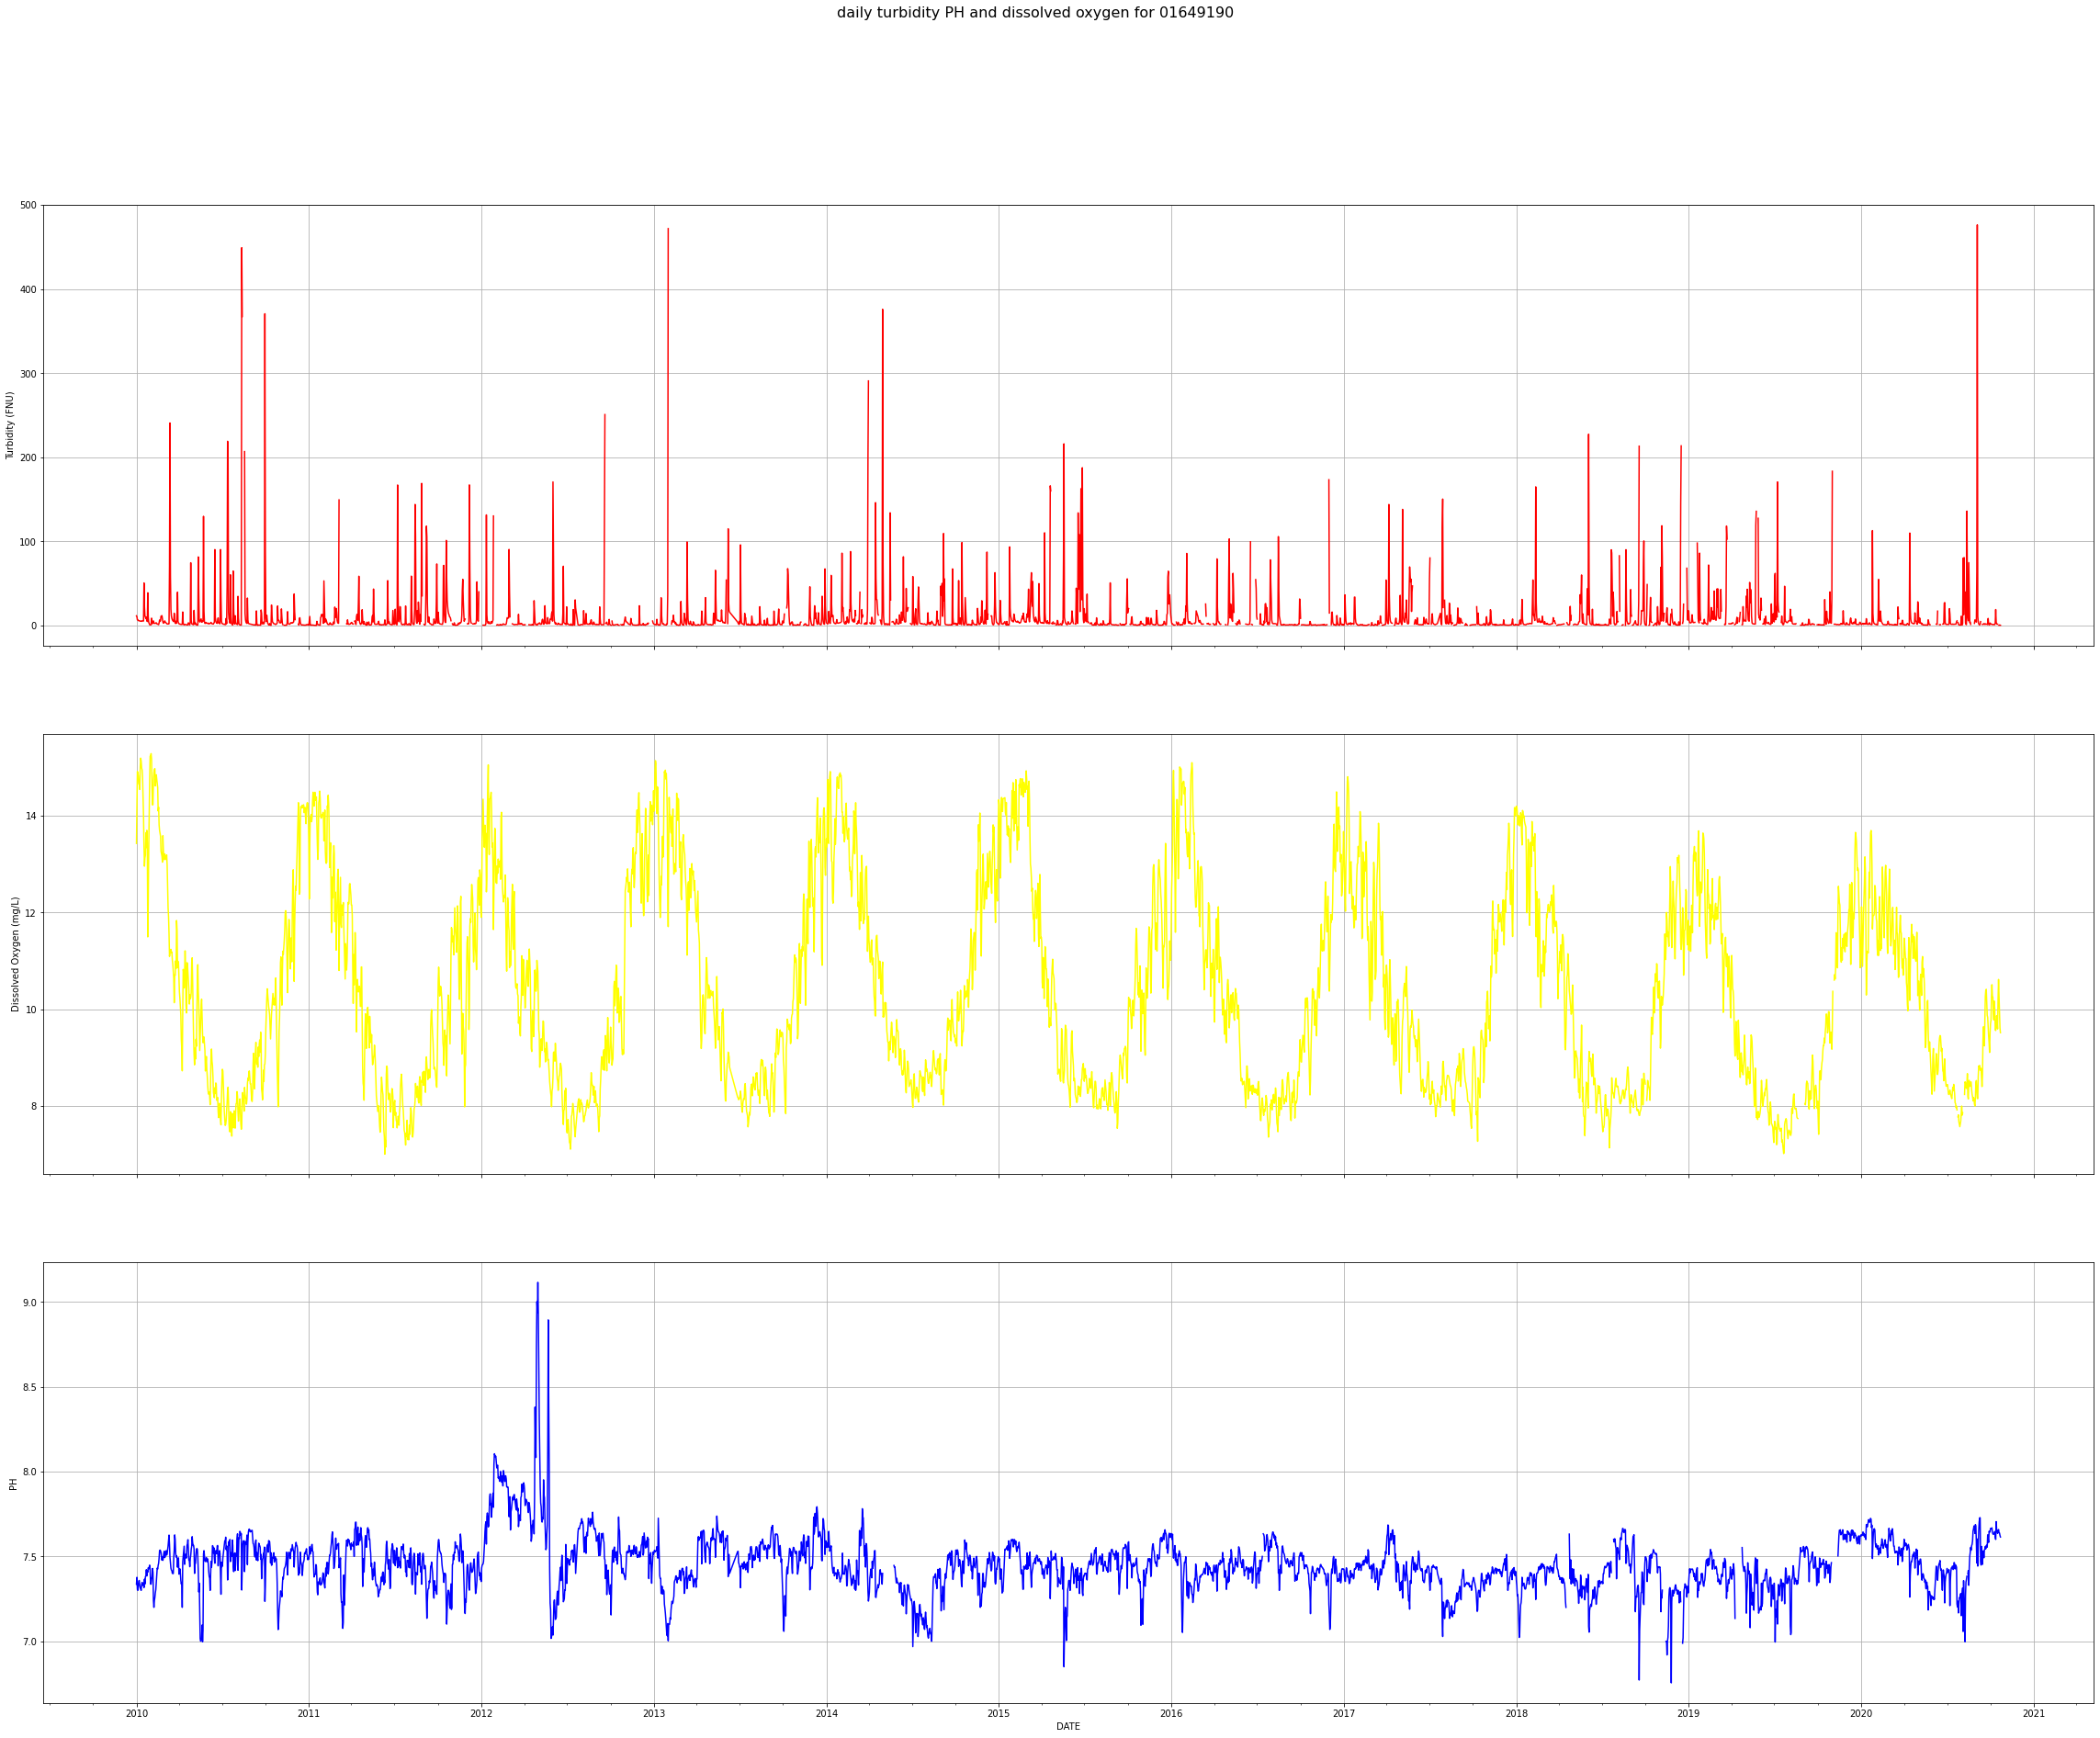

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(40, 30))
fig.suptitle('daily turbidity PH and dissolved oxygen for 01649190', fontsize=16)
df_agg_01649190['Turbidity_FNU1'].plot(ax = ax1, x='DATE', y='Turbidity_FNU1', color = 'red')
ax1.set(ylabel ="Turbidity (FNU)")
df_agg_01649190['Dissolved_Oxy_DO'].plot(ax=ax2, x='DATE', y='Dissolved_Oxy_DO', color ='yellow')
ax2.set(ylabel ="Dissolved Oxygen (mg/L)")
df_agg_01649190['PH1'].plot(ax=ax3, x='DATE', y='PH1', color = 'blue')
ax3.set(ylabel ="PH")

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
#ax1.xaxis.get_majorticklabels()

ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(years_fmt)
ax2.xaxis.set_minor_locator(months)

ax3.xaxis.set_major_locator(years)
ax3.xaxis.set_major_formatter(years_fmt)
ax3.xaxis.set_minor_locator(months)


#ax1.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax1.grid(which = 'major', axis ='both', b='True')
ax2.grid(which = 'major', axis ='both', b='True')
ax3.grid(which = 'major', axis ='both', b='True')

plt.show()

*Plotting for the PH and Dissolved Oxygen for Gage 01649500*

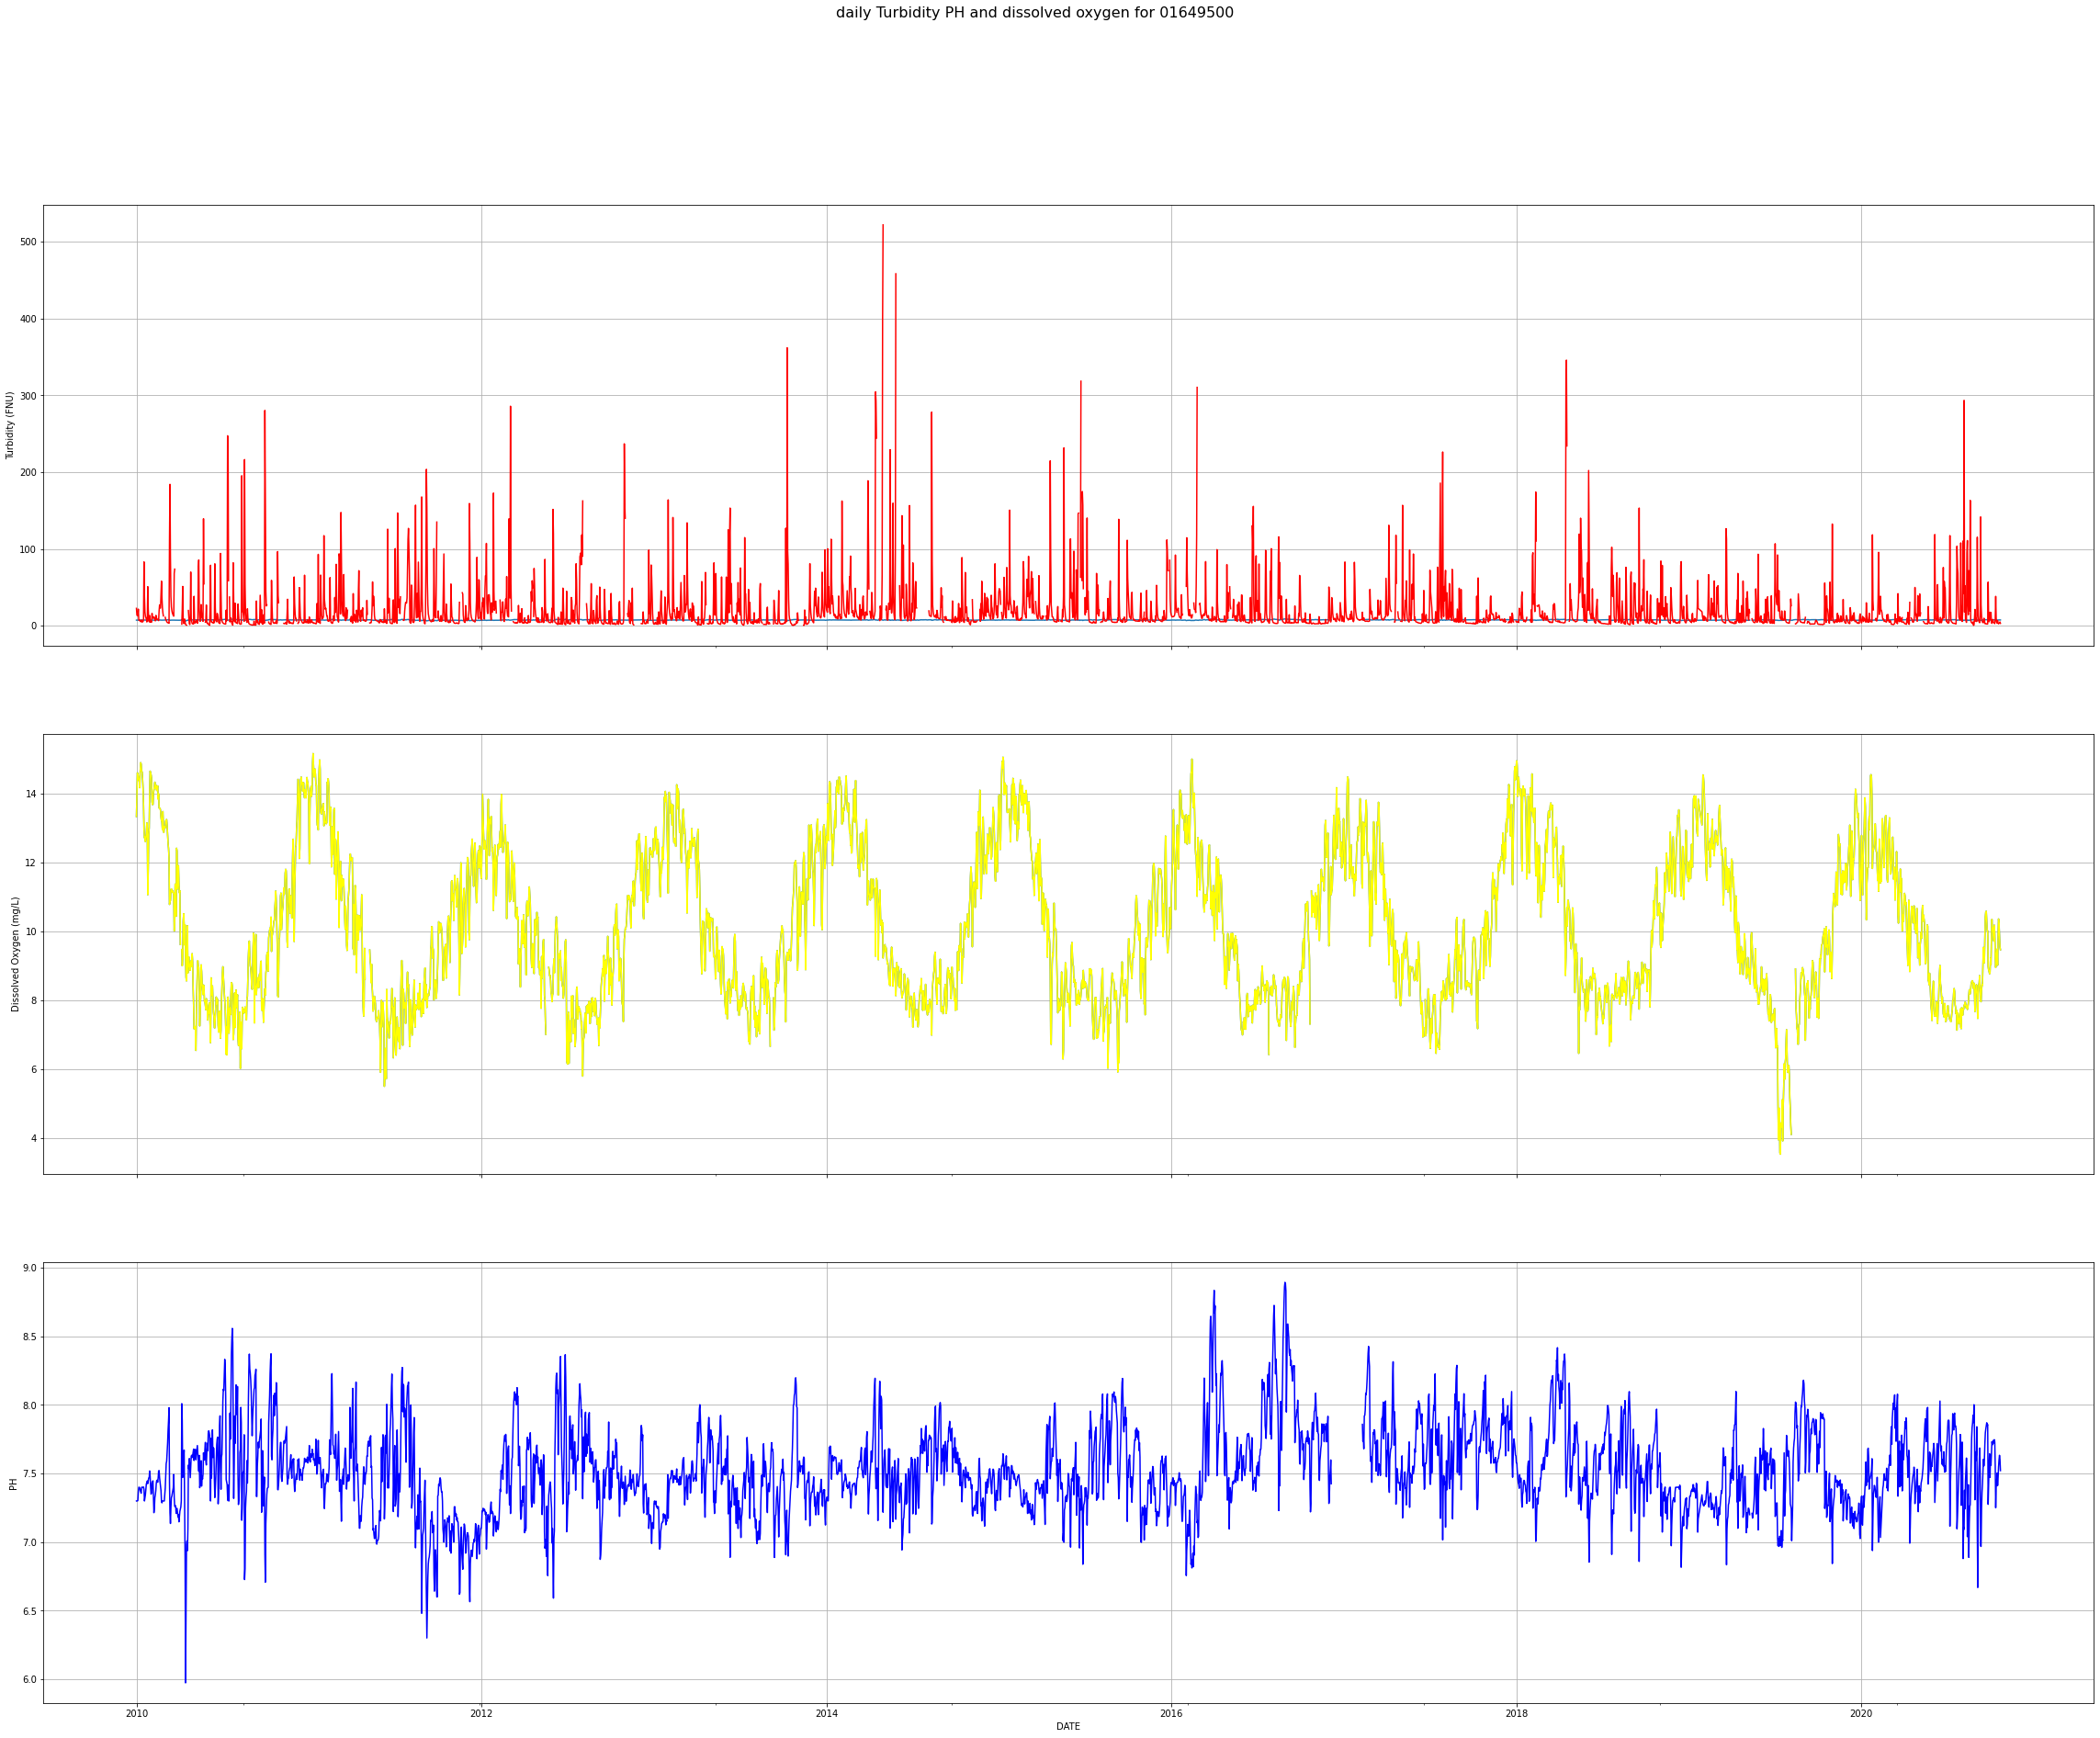

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(40, 30))
fig.suptitle('daily Turbidity PH and dissolved oxygen for 01649500', fontsize=16)
df_agg_01649500['PH'].plot(ax = ax1, x='DATE', y='PH')
df_agg_01649500['Dissolved_Oxy_DO'].plot(ax=ax2, x='DATE', y='Dissolved_Oxy_DO')

df_agg_01649500['Turbidity_FNU'].plot(ax = ax1, x='DATE', y='Turbidity_FNU', color = 'red')
ax1.set(ylabel ="Turbidity (FNU)")
df_agg_01649500['Dissolved_Oxy_DO'].plot(ax=ax2, x='DATE', y='Dissolved_Oxy_DO', color ='yellow')
ax2.set(ylabel ="Dissolved Oxygen (mg/L)")
df_agg_01649500['PH'].plot(ax=ax3, x='DATE', y='PH', color = 'blue')
ax3.set(ylabel ="PH")

ax1.grid(which = 'major', axis ='both', b='True')
ax2.grid(which = 'major', axis ='both', b='True')
ax3.grid(which = 'major', axis ='both', b='True')


plt.show()

*This will complete the plots for the imported data from the water quality sampling. The next step will be to be able to plot the population in the county to see if any coorelation can be developed. *

# **4. Combined Plot Analysis**

*To inspect the data even further, I computed the yearly average measurements for each parameters. In order to be able to do that, I have to add the year as a column in the aggrigate data and then use group by that column computing the average. I also cut the population data (initially showing from 1980 to 2019 so that it shows the last 9 entries.*

In [23]:
Population_2010 = DF_Population.tail(10)
Population_2010.columns =['Year', 'Population'] 
Population_2010 = Population_2010.set_index('Year')
Population_2010


,Population
Year,
2010,865747
2011,874389
2012,882490
2013,890658
2014,899686
2015,906197
2016,908501
2017,909705
2018,909619


*The following codes will aggrigate the gage data into yearly average.*

In [28]:
df_YR_01649190 = (df_agg_01649190.groupby(['YEAR'])['Turbidity_FNU1','PH1', 'Dissolved_Oxy_DO'].mean().reset_index())
df_YR_01649190 = df_YR_01649190.set_index('YEAR')
df_YR_01649500 = (df_agg_01649500.groupby(['YEAR'])['Turbidity_FNU','PH','Dissolved_Oxy_DO'].mean().reset_index())
df_YR_01649500 = df_YR_01649500.set_index('YEAR')
df_YR_01649190

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Turbidity_FNU1,PH1,Dissolved_Oxy_DO
YEAR,,,
2010,12.892933,7.465874,10.582226
2011,10.786115,7.446176,10.230467
2012,6.172234,7.647321,10.460001
2013,7.554998,7.485050,10.787812
2014,12.667625,7.376096,10.895963
2015,10.567798,7.450596,10.564758
2016,7.058729,7.434498,10.441241
2017,6.850500,7.386335,10.253487
2018,11.348024,7.368237,10.197297


In [29]:
df_YR_01649500

,Turbidity_FNU,PH,Dissolved_Oxy_DO
YEAR,,,
2010,18.715999,7.570251,10.227146
2011,22.501618,7.371240,9.995004
2012,20.683853,7.485678,9.887856
2013,18.337020,7.424445,10.376373
2014,31.599327,7.511005,10.489859
2015,24.596716,7.493868,10.051463
2016,17.466678,7.734499,10.202060
2017,17.323638,7.717941,10.156337
2018,22.007444,7.557556,10.365309


## **4.1 Comparison plot for GAGE 01649190**

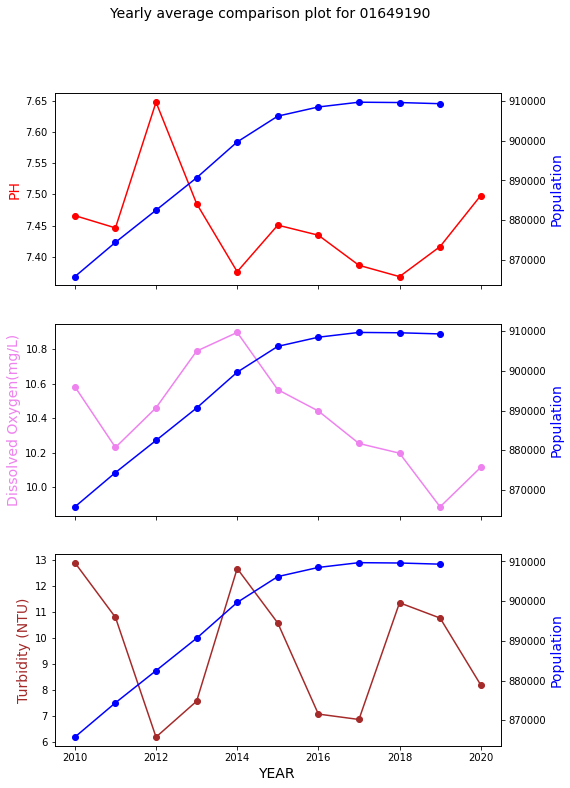

In [59]:
# create figure and axis objects with subplots()
fig,axs = plt.subplots(3, sharex=True, figsize=(8,12))
fig.suptitle('Yearly average comparison plot for 01649190', fontsize=14)
# make a plot
axs[0].plot(df_YR_01649190['PH1'], color="red", marker="o")
#set y-axis label
axs[0].set_ylabel("PH",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=axs[0].twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Population_2010["Population"],color="blue",marker="o")
ax2.set_ylabel("Population",color="blue",fontsize=14)
#**************************************************************************
axs[1].plot(df_YR_01649190['Dissolved_Oxy_DO'], color="violet", marker="o")
axs[1].set_ylabel("Dissolved Oxygen(mg/L)",color="violet",fontsize=14)
ax3=axs[1].twinx()
ax3.plot(Population_2010["Population"],color="blue",marker="o")
ax3.set_ylabel("Population",color="blue",fontsize=14)
#***************************************************************************
axs[2].plot(df_YR_01649190['Turbidity_FNU1'], color="brown", marker="o")
axs[2].set_xlabel("YEAR",fontsize=14)
axs[2].set_ylabel("Turbidity (NTU)",color="brown",fontsize=14)
ax4=axs[2].twinx()
ax4.plot(Population_2010["Population"],color="blue",marker="o")
ax4.set_ylabel("Population",color="blue",fontsize=14)

plt.show()


## **4.2 Comparison plot for GAGE 01649500**

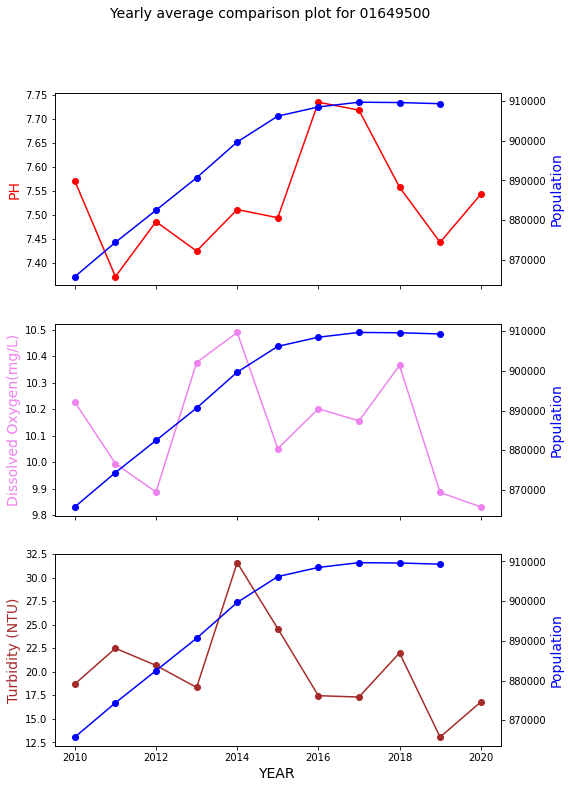

In [61]:
# create figure and axis objects with subplots()
fig,axs = plt.subplots(3, sharex=True, figsize=(8,12))
fig.suptitle('Yearly average comparison plot for 01649500', fontsize=14)
# make a plot
axs[0].plot(df_YR_01649500['PH'], color="red", marker="o")
#set y-axis label
axs[0].set_ylabel("PH",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=axs[0].twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Population_2010["Population"],color="blue",marker="o")
ax2.set_ylabel("Population",color="blue",fontsize=14)
#**************************************************************************
axs[1].plot(df_YR_01649500['Dissolved_Oxy_DO'], color="violet", marker="o")
axs[1].set_ylabel("Dissolved Oxygen(mg/L)",color="violet",fontsize=14)
ax3=axs[1].twinx()
ax3.plot(Population_2010["Population"],color="blue",marker="o")
ax3.set_ylabel("Population",color="blue",fontsize=14)
#***************************************************************************
axs[2].plot(df_YR_01649500['Turbidity_FNU'], color="brown", marker="o")
axs[2].set_xlabel("YEAR",fontsize=14)
axs[2].set_ylabel("Turbidity (NTU)",color="brown",fontsize=14)
ax4=axs[2].twinx()
ax4.plot(Population_2010["Population"],color="blue",marker="o")
ax4.set_ylabel("Population",color="blue",fontsize=14)

plt.show()

# **5. Observation/Conclusion**

*Both gage measurements displayed similar patterns. While the population was constantly increasing from year to year, there is some improvement in water quality especially around the 2013- 2016. This is shown with the pH decreasing to neutral (around 7) and the turbidity also decreasing. One major driving factor for this improvement may be the watershed based programs that were established arround the year 2010 in order to improve the water quality in the Chesepeak Bay. As part of a future investigation, I would suggest expanding the data timeframe to include prior years in order to capture the sharp population increase before it starting to flatten out around the 2014 year.*